In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

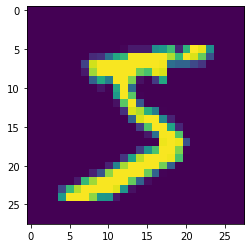

In [5]:
plt.imshow(x_train[0])

In [6]:
y_train[0]

5

In [7]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Reshape

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[0].shape

(28, 28)

In [16]:
model = Sequential([
    Input((28, 28)),
    Reshape((28, 28, -1)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 128)        

In [17]:
model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [18]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2588 - accuracy: 0.9285 - val_loss: 0.1127 - val_accuracy: 0.9665
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0893 - accuracy: 0.9738 - val_loss: 0.0658 - val_accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0671 - accuracy: 0.9807 - val_loss: 0.0768 - val_accuracy: 0.9788
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0540 - accuracy: 0.9843 - val_loss: 0.0925 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0471 - accuracy: 0.9865 - val_loss: 0.0686 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0412 - accuracy: 0.9880 - val_loss: 0.0552 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0329 - accuracy: 0.9905 - val_loss: 0.0784 -

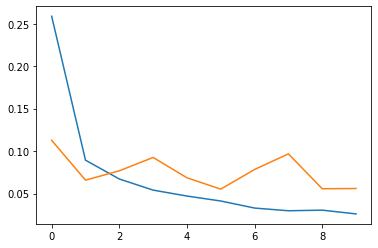

In [19]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

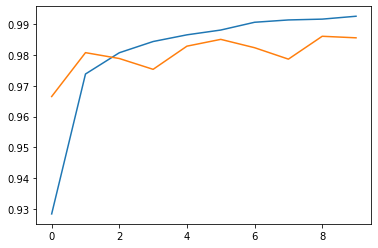

In [20]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

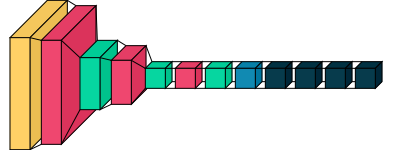

In [21]:
import visualkeras

visualkeras.layered_view(model)